# <img src = "./resources/GA.png" width = "25" height = "25" /> <span style = "color:Purple" > Project 5 : Food Insecurity Regression Study </span> 
---
## <span style = "color:Green" > Exploratory Data Analysis </span>      

#### Ira Seidman, Alec Edgecliffe-Johnson, Ryan McDonald, Andrew Roberts - General Assembly 
---

### Notebook Contents:

- [Reading the Data](#intro)
- [Data Dictionary](#dict)
- [Plots](#plots)
    - [Correlation Heat Maps](#corr)
    - [Histogram](#hist)
    - [Box Plots](#box)
    - [Scatter Plots](#scatter)
    - [Bar Plots](#bar)


**Imports**

In [1]:
# Data manipulation imports
import pandas as pd

# Plotting imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='intro'></a>
## 1. Read in data

In [2]:
df = pd.read_csv('data/df_final.csv')
econ = pd.read_csv('cleaned_dataframes/df_m_median.csv')

In [3]:
df.shape, econ.shape

((3140, 60), (3140, 60))

<a id='dict'></a>
### Data Dictionary:

Data Dictionary created for datasets utilized in this analysis

| Feature Name                                  | Description                                         | Feature Name                                                  | Description                      |
|-----------------------------------------------|-----------------------------------------------------|---------------------------------------------------------------|----------------------------------|
| fips                                          | Federal Information Processing Series Code          | percent_enrolled_in_free_or_reduced_lunch                     | Percent                          |
| state_name                                    | Name                                                | percent_homeowners                                            | Percent                          |
| county                                        | County Name                                         | percent_65_and_over                                           | Percent                          |
| lat                                           | Latitude Ordinate                                   | percent_black                                                 | Percent                          |
| lon                                           | Longitude Ordinate                                  | percent_american_indian_alaska_native                         | Percent                          |
| total_population                              | Number                                              | percent_asian                                                 | Percent                          |
| area_sqmi                                     | Sq-Mi Area of County                                | percent_native_hawaiian_other_pacific_islander                | Percent                          |
| population_density_per_sqmi                   | Number / SqMi                                       | percent_hispanic                                              | Percent                          |
| percent_fair_or_poor_health                   | Percentage                                          | percent_non_hispanic_white                                    | Percent                          |
| average_number_of_mentally_unhealthy_days     | Ave Days /Month of Stress/Depression/Etc.           | percent_not_proficient_in_english                             | Percent                          |
| percent_low_birthweight                       | Percent Less Than 5lb, 8oz at Birth                 | percent_female                                                | Percent                          |
| percent_smokers                               | Percent                                             | percent_rural                                                 | Percent                          |
| percent_adults_with_obesity                   | Percent Above BMI = 30                              | per_capita_income                                             | Number                           |
| food_environment_index                        | 0-10(best) Ability to and Access to Food            | percent_below_poverty                                         | Percent                          |
| percent_physically_inactive                   | Percent Not Participating in Leisure Activities     | percent_unemployed_CDC                                        | Percent                          |
| percent_with_access_to_exercise_opportunities | Percent Within Reasonable Proximity to Exercise     | percent_no_highschool_diploma                                 | Percent                          |
| percent_uninsured                             | Percent                                             | percent_age_17_and_younger                                    | Percent                          |
| primary_care_physicians_rate                  | Ratio (County Pop./# PCP)                           | percent_disabled                                              | Percent                          |
| high_school_graduation_rate                   | Ratio                                               | percent_minorities                                            | Percent                          |
| percent_children_in_poverty                   | Percent                                             | percent_limited_english_abilities                             | Percent                          |
| num_households_CHR                            | # Households in County                              | percentile_rank_social_vulnerability                          | Percentile Disaster Preparedness |
| percent_single_parent_households_CHR          | Percent                                             | pct_overall_pov_19                                            | Percent                          |
| violent_crime_rate                            | # Violent Crimes/100,000 Pop.                       | cpm_18                                                        | Average Cost Per Meal            |
| percent_severe_housing_problems               | Percent Without Adequate Housing Features           | state_abr                                                     | 2 Letter State Abbr.             |
| severe_housing_cost_burden                    | Percent Pop. With > 50% Income Utilized for Housing | percent_of_adults_with_less_than_high_school_diploma          | Percent                          |
| life_expectancy                               | Number                                              | percent_of_adults_with_high_school_diploma_only               | Percent                          |
| percent_adults_with_diabetes                  | Percent                                             | percent_of_adults_completing_some_college_or_associate_degree | Percent                          |
| percent_limited_access_to_healthy_foods       | Percent With Limited Access to Grocery Stores       | percent_of_adults_with_bachelor_degree_or_higher              | Percent                          |
| median_household_income                       | Number                                              | fi_rate_18                                                    | Percent                          |
| ch_fi_rate_18                                                | Percent                                                    |

<a id='plots'></a>
## 2. EDA Plots
<a id='corr'></a>
### Correlation Heat Maps

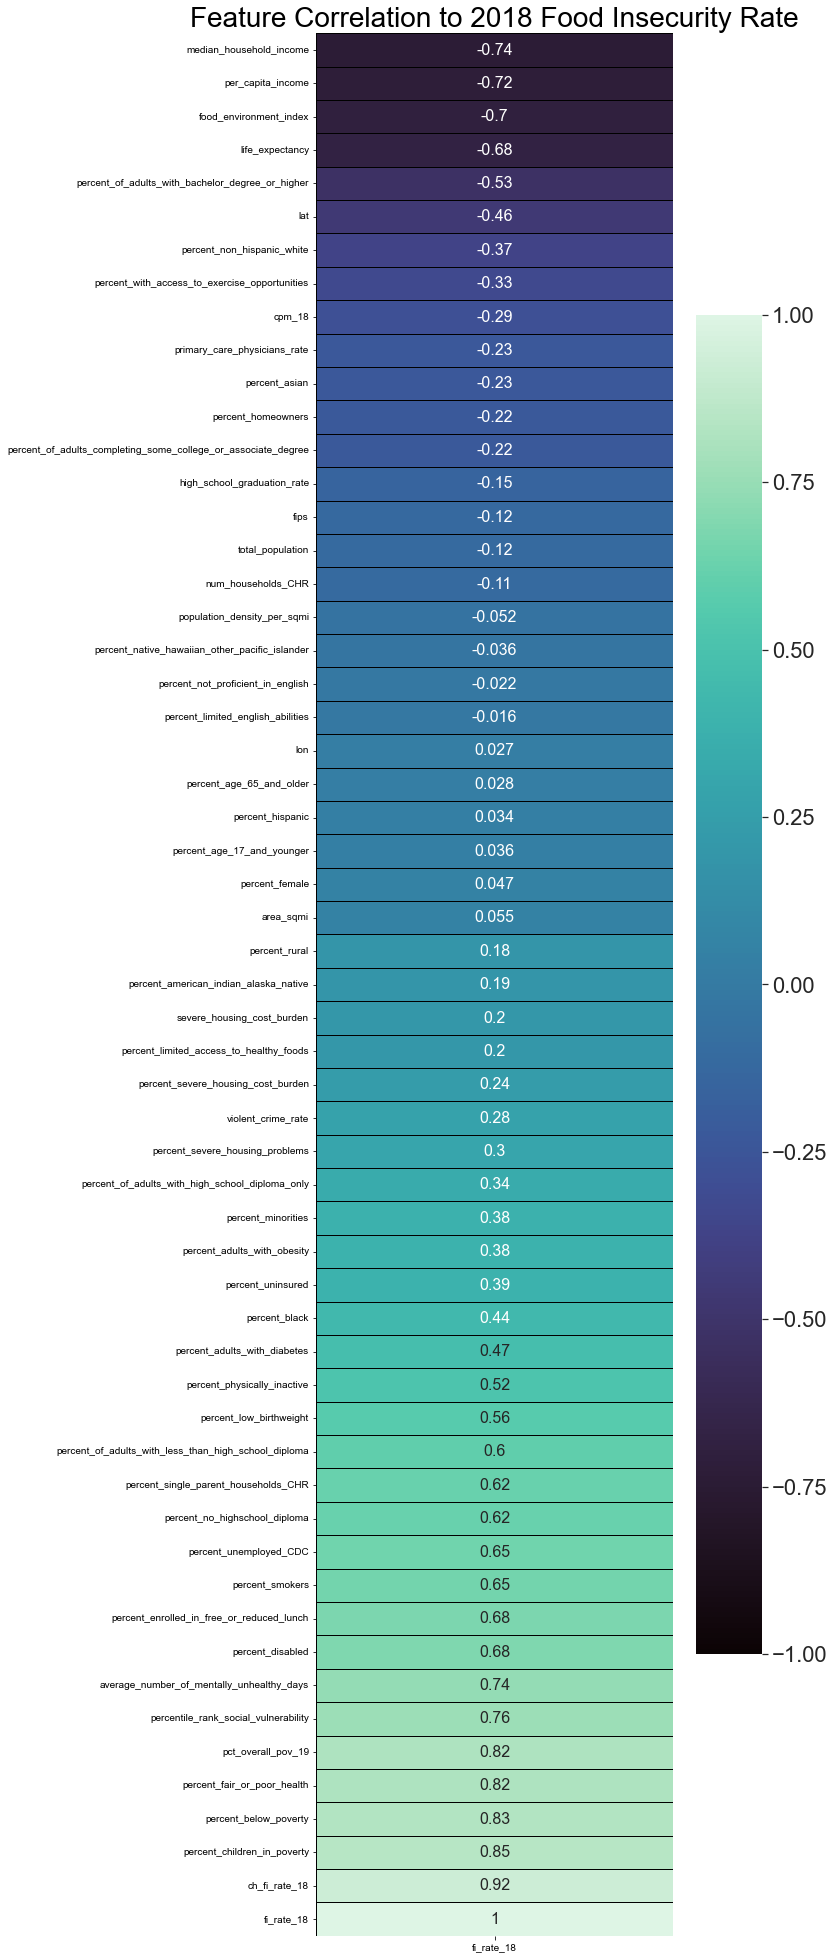

In [4]:
plt.figure(figsize = (8, 35))
ax = plt.axes()
ax.set_title('Feature Correlation to 2018 Food Insecurity Rate', {'fontsize' : 28})
corr = df.corr()[['fi_rate_18']]
sns.set(font_scale = 2)
sns.heatmap(corr.sort_values(by = 'fi_rate_18', ascending = True), 
            annot = True, cmap = 'mako', vmin = -1, vmax = 1, linecolor = 'black', 
            linewidth = 1, annot_kws = {'fontsize' : 16});

In [5]:
# Indexed to exclude our target variable(s)
corr.sort_values(by = 'fi_rate_18', ascending = False)[2:12]

,fi_rate_18
percent_children_in_poverty,0.851354
percent_below_poverty,0.832892
percent_fair_or_poor_health,0.819851
pct_overall_pov_19,0.819300
percentile_rank_social_vulnerability,0.760997
average_number_of_mentally_unhealthy_days,0.735432
percent_disabled,0.684319
percent_enrolled_in_free_or_reduced_lunch,0.675576
percent_smokers,0.648979
percent_unemployed_CDC,0.645176


**Abridged Correlation Map - Socio-Economic Components (related to poverty):**

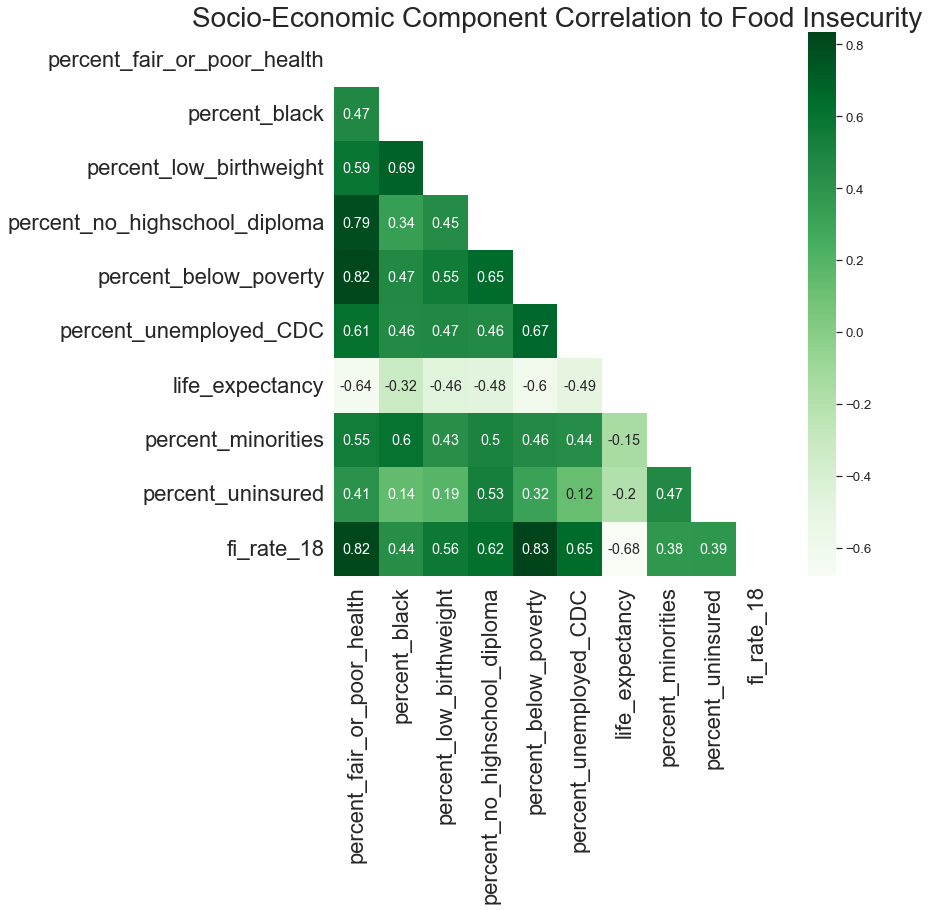

In [6]:
abridged = ['percent_fair_or_poor_health', 'percent_black',
            'percent_low_birthweight','percent_no_highschool_diploma',
            'percent_below_poverty', 'percent_unemployed_CDC',
            'life_expectancy', 'percent_minorities',
            'percent_uninsured', 'fi_rate_18']

df_abr = df[abridged].copy()
corr = df_abr.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.figure(figsize = (10, 10))
ax = plt.axes()
sns.set(font_scale = 1.2)
ax.set_facecolor('white') #set non-heatmap cell color to white, credit to stackover - https://stackoverflow.com/questions/52393084/how-to-assign-custom-color-to-masked-cells-in-seaborn-heatmap
sns.heatmap(corr, annot = True, cmap = 'Greens', mask = mask, ax = ax)
ax.set_title('Socio-Economic Component Correlation to Food Insecurity', {'fontsize' : 28})
plt.show()

**Socio-Economic Component Correlation to Food Insecurity**

The fact that percent_below_poverty is well correlated with fi_rates_18 (.83) and fair_or_poor_health (.82) is not surprising given the relative difficulty of finding low-cost and nutritious food compared with low-cost and ess less-nutritious alternatives (like heavily processed foods). Equally unsurprising, poverty is well correlated with percent_no_highschool_diploma (.65) and percent_unemployed_CDC (.67) and is negatively correlated with life expectancy (-.6).

Percent_low_birthweight correlations are interesting to consider as they display some possible intergenerational dimensions of food insecurity. The correlation with percent_fair_or_poor_health (.59), percent_below_poverty (.55) and fi_rate_18 (.56) is, again, unsurprising given the affect of nutrients and health on birthweight. However, the high correlation with percent_black (.69) is slightly more surprising, especially as percent_black does not have correlations over .5 with any other feature in this selection

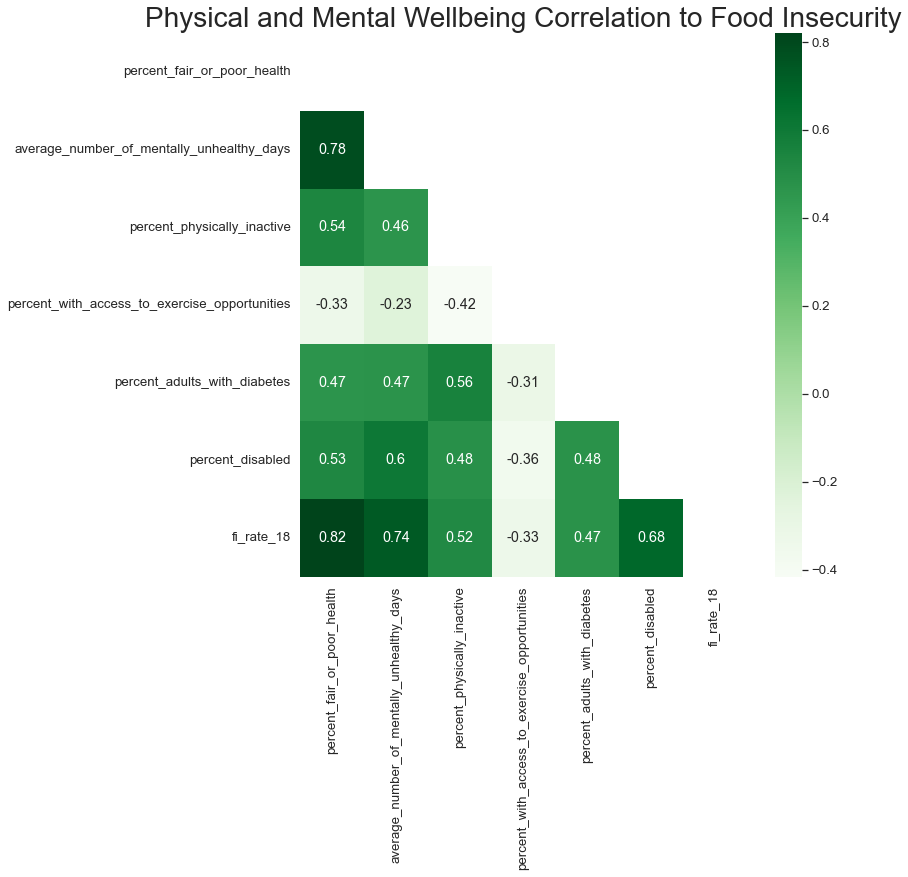

In [7]:
wellbeing= ['percent_fair_or_poor_health','average_number_of_mentally_unhealthy_days',
            'percent_physically_inactive','percent_with_access_to_exercise_opportunities',
            'percent_adults_with_diabetes','percent_disabled', 'fi_rate_18']

df_abr = df[wellbeing].copy()
corr = df_abr.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.figure(figsize = (10, 10))
ax = plt.axes()
sns.set(font_scale = 1.2)
ax.set_facecolor('white')
sns.heatmap(corr, annot = True, cmap = 'Greens', mask = mask, ax = ax)
ax.set_title('Physical and Mental Wellbeing Correlation to Food Insecurity', {'fontsize' : 28})
plt.show()

**Physical and Mental Wellbeing Component Correlation to Food Insecurity**

It makes sense that percent_fair_or_poor_health shows a very high (0.82) correlation to food insecurity. This is followed closely by average_number_of_mentally_unhealthy_days (0.74) and percent_disabled (0.68). When people have physical or mental restrictions, food insecurity will likely follow. Unfortunately, it's a cycle with an increase in food insecurity likely resulting in additional physical and mental degradations. What was surprising from this correlation map was the negative correlation found between percent_access_to_execise_opportunities and food insecurity.

Perhaps having access to exercise (creating potentially healthier lifestyles) reduces food insecurity rates. Or, on the other hand, having this access may be considered more of a 'privilege'. Not all communities can provide parks, gyms, other greenspace to its citizens. And those counties that can appear to have better access to resources (food, physical/mental care, others), resulting in less food insecurities

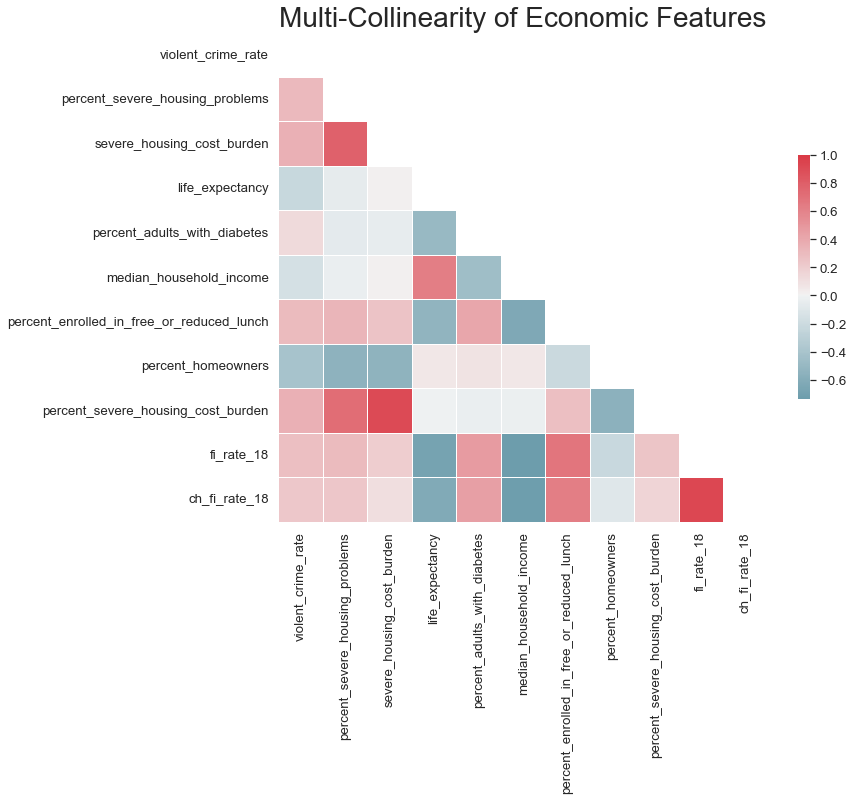

In [8]:
# Heatmap to explore how remaining suspected variables effect fi and chi_fi. Code borrowed from Connor Anderson Medium
econ_financial_demographics = econ[['violent_crime_rate', 'percent_severe_housing_problems', 'severe_housing_cost_burden',
                                    'life_expectancy', 'percent_adults_with_diabetes', 'median_household_income',
                                    'percent_enrolled_in_free_or_reduced_lunch', 'percent_homeowners',
                                    'percent_severe_housing_cost_burden', 'fi_rate_18','ch_fi_rate_18']] #creating a mask the size of our covariance matrix

corr = econ_financial_demographics.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
f, ax = plt.subplots(figsize = (11, 9)) #generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True) #draw the heatmap with the mask and correct aspect ratio
ax.set_facecolor('white')
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidth = .5, cbar_kws = {'shrink': .5}), ax.set_title('Multi-Collinearity of Economic Features',
                                                                     {'fontsize' : 28});

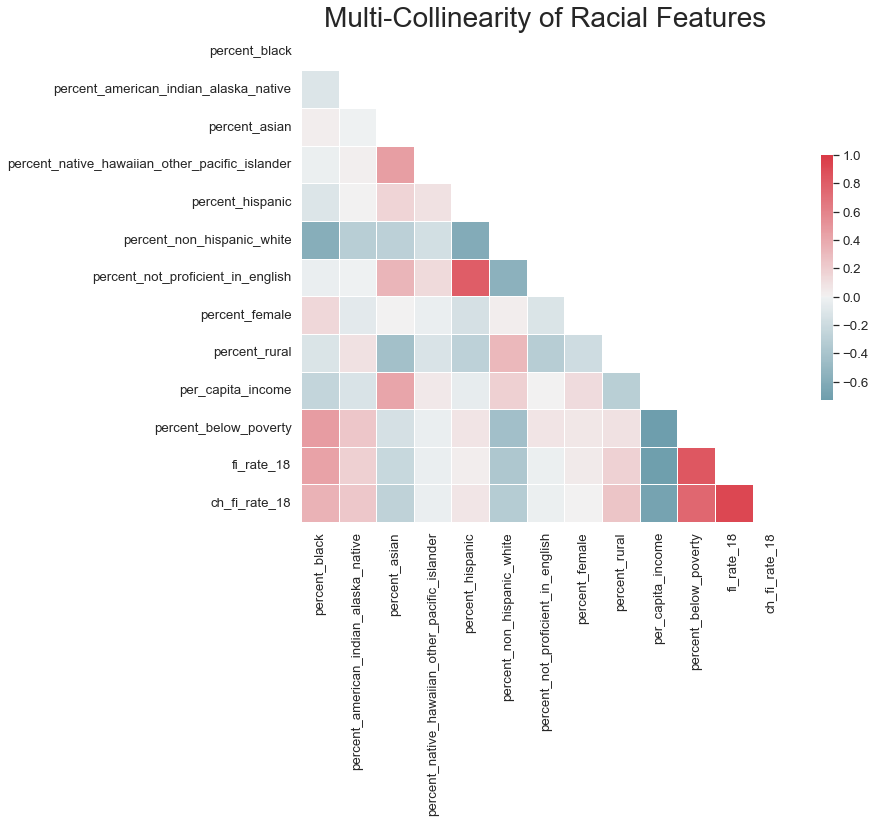

In [9]:
# Heatmap to explore how remaining suspected variables effect fi and chi_fi. Code borrowed from Connor Anderson Medium
econ_race_demos = econ[['percent_black', 'percent_american_indian_alaska_native', 'percent_asian',
                        'percent_native_hawaiian_other_pacific_islander', 'percent_hispanic', 'percent_non_hispanic_white',
                        'percent_not_proficient_in_english', 'percent_female', 'percent_rural', 'per_capita_income',
                        'percent_below_poverty', 'fi_rate_18','ch_fi_rate_18']] #creating a mask the size of our covariance matrix

corr = econ_race_demos.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
ax.set_facecolor('white')
f, ax = plt.subplots(figsize = (11, 9))# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)# Draw the heatmap with the mask and correct aspect ratio
ax.set_facecolor('white')
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidth = .5, cbar_kws = {'shrink': .5}), ax.set_title('Multi-Collinearity of Racial Features',
                                                                     {'fontsize' : 28});

### Histograms of Numerical Features

Distribution Review

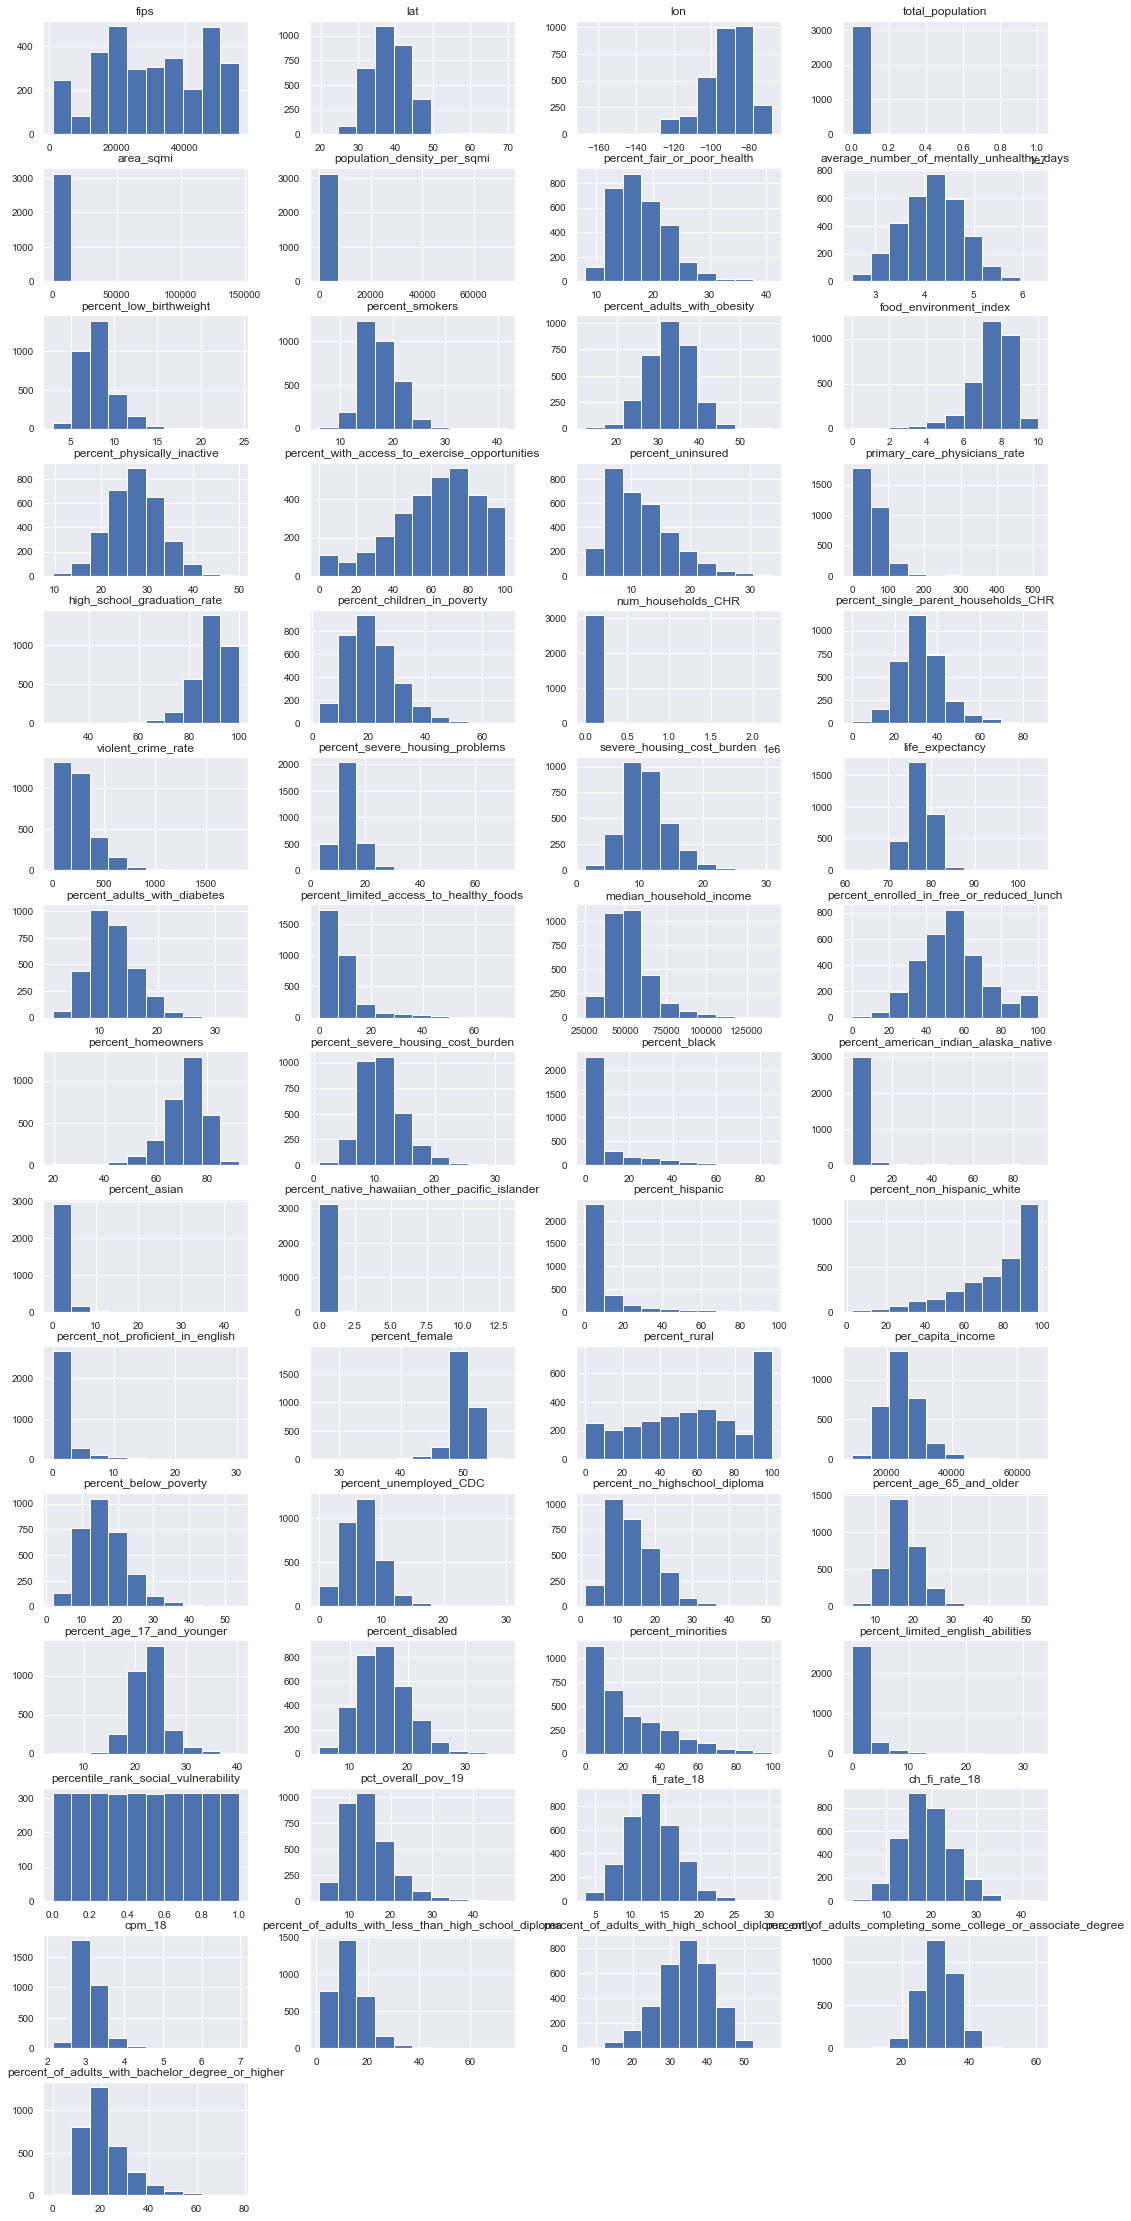

In [10]:
# Distribution by Count (number of counties)
sns.set(font_scale = 1.0)
df.hist(figsize = (18, 40), layout = (15, 4), xlabelsize = 10, ylabelsize = 10);

<a id='box'></a>
### Box Plots For 'Percentage-Based' Statistics
For high level review of data

In [11]:
df.filter(like = 'percent', axis = 1).shape

(3140, 37)

### Box Plots For 'Rate-Based' Statistics

In [12]:
df.filter(like = 'rate', axis = 1).shape

(3140, 5)

In [13]:
df.filter(like = 'rate', axis = 1).head()

,primary_care_physicians_rate,high_school_graduation_rate,violent_crime_rate,fi_rate_18,ch_fi_rate_18
0,45.04180,90.000000,272.282220,15.6,21.4
1,72.89727,86.361577,203.660396,12.9,16.9
2,31.65809,81.410256,414.277861,21.9,32.0
3,48.52656,83.763838,89.349126,15.1,20.9
4,22.40877,93.468795,482.690611,13.6,19.1


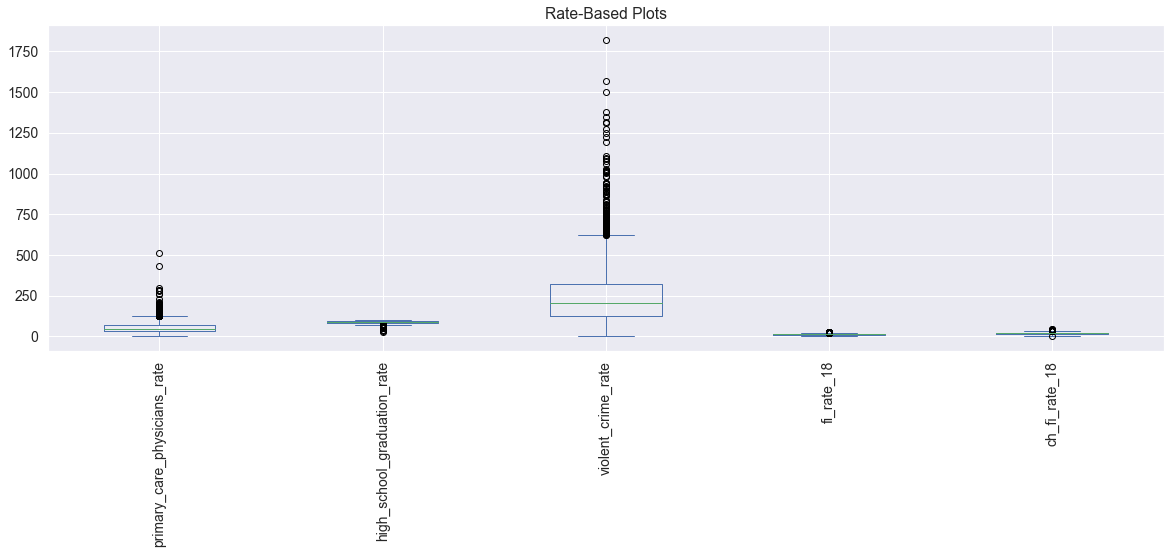

In [14]:
sns.set(font_scale = 1.3)
df[df.filter(like = 'rate', axis = 1).columns[0:6]
       ].plot(kind = 'box', figsize = (20, 6), rot = 90,fontsize = 14, title = 'Rate-Based Plots');

In [15]:
df_crime = df[['violent_crime_rate','state_name','county']]

In [16]:
df_crime[df_crime['violent_crime_rate'] > 750].shape

(63, 3)

In [17]:
df_crime[df_crime['violent_crime_rate'] > 750].sort_values(by = 'violent_crime_rate', ascending = False).head(10)

,violent_crime_rate,state_name,county
1595,1819.514406,Missouri,St. Louis City
1214,1566.312209,Maryland,Baltimore City
405,1499.432647,Georgia,Calhoun
1148,1378.436162,Louisiana,Ouachita
2504,1346.154765,Tennessee,Shelby
595,1316.354271,Illinois,Alexander
528,1306.977047,Georgia,Turner
128,1274.262551,Arkansas,Crittenden
744,1251.169030,Indiana,Marion
319,1226.434877,District of Columbia,District of Columbia


**Rate-Based Stats:**

What really stands out in this plot are the outliers for violent_crime_rate.  Unfortunately, there are 63 counties spead all around the country that suffer from much higher violent crime rates (top ten listed above)

<a id='scatter'></a>
### Scatter Plots

One of the most important findings from the scatter plots below was the disparities between food insecurities in general, and the food insecurity rate of children. The plots below show higher food insecurity rates amongst children in practically all categories.  Statistics by state, population density, health factors, education, and poverty rating all show children taking the brunt of food insecurities:

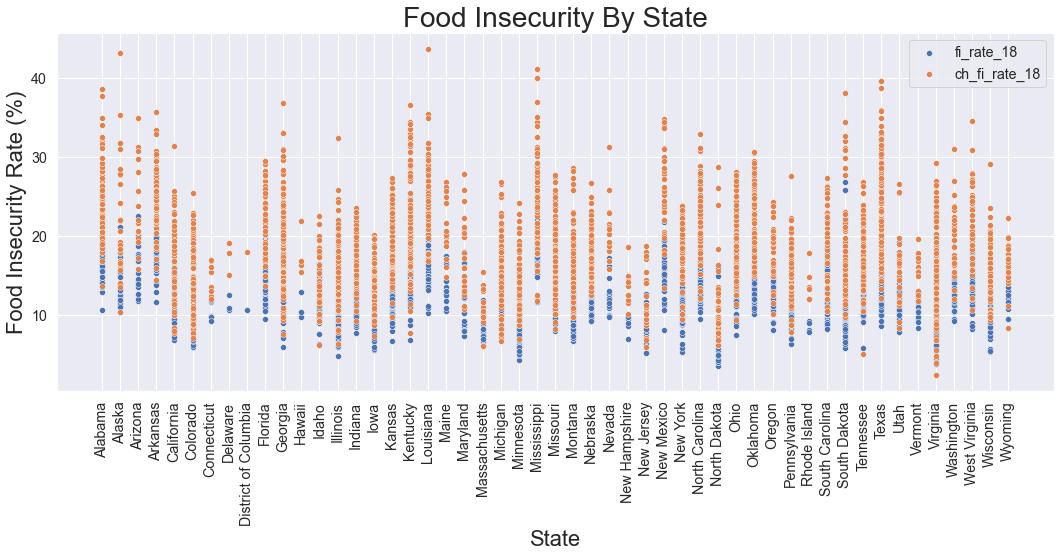

In [18]:
# Overlay scatterplots - blue is general rate, red is child rate
plt.figure(figsize = (15, 8))
sns.scatterplot(data = econ, x = 'state_name', y = 'fi_rate_18', palette = 'Blues')
sns.scatterplot(data = econ, x = 'state_name', y = 'ch_fi_rate_18', palette = 'Reds')

plt.legend(labels = ['fi_rate_18','ch_fi_rate_18'])
plt.title('Food Insecurity By State', size = 28)
plt.xlabel('State', size = 22)
plt.ylabel('Food Insecurity Rate (%)', size = 22)
plt.xticks(rotation = 90); #credit to stackabuse - https://stackabuse.com/rotate-axis-labels-in-matplotlib/

plt.tight_layout();

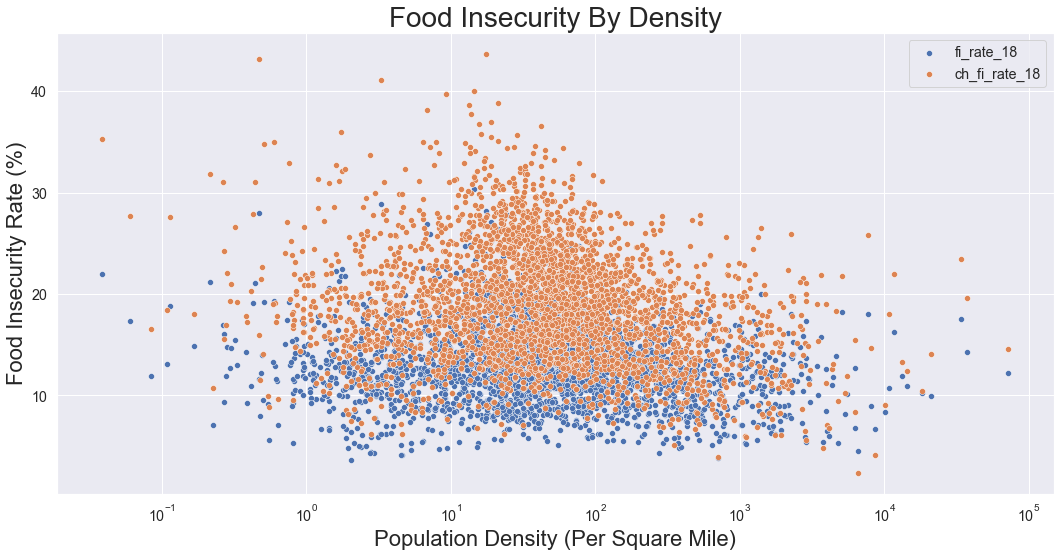

In [19]:
# Check food insecurity against density
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = econ, x = 'population_density_per_sqmi', y = 'fi_rate_18', palette = 'Blues')
g = sns.scatterplot(data = econ, x = 'population_density_per_sqmi', y = 'ch_fi_rate_18', palette = 'Reds')

plt.legend(labels=['fi_rate_18','ch_fi_rate_18'])
plt.title('Food Insecurity By Density', size = 28)
plt.xlabel('Population Density (Per Square Mile)', size = 22)
plt.ylabel('Food Insecurity Rate (%)', size = 22)
g.set_xscale("log")

plt.tight_layout();

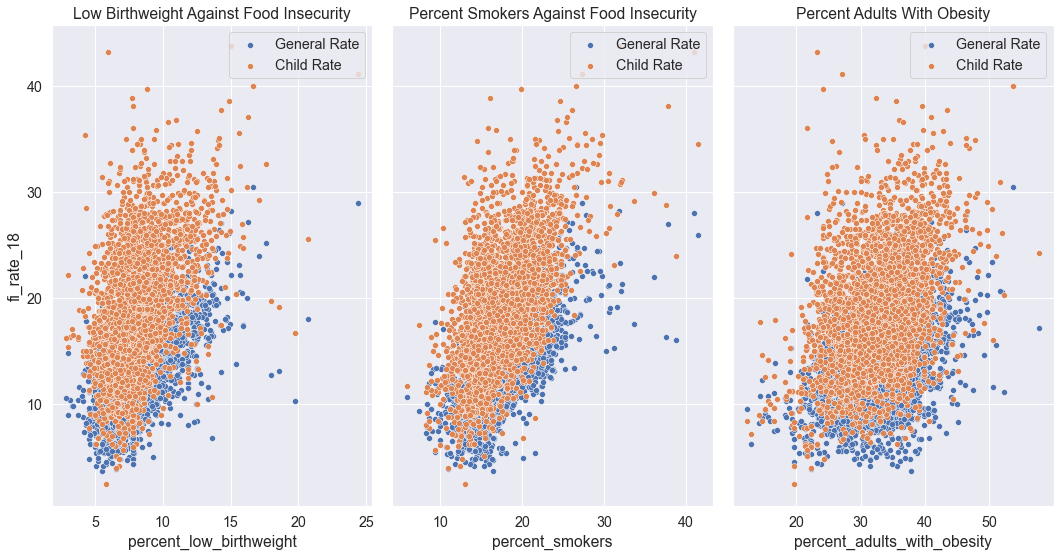

In [20]:
# Health Factors Against Food Insecurity
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 8), sharey = True)

g = sns.scatterplot(data = econ, x = 'percent_low_birthweight', y = 'fi_rate_18', palette = 'Blues', ax = ax1)
g = sns.scatterplot(data = econ, x = 'percent_low_birthweight', y = 'ch_fi_rate_18', palette = 'Reds', ax = ax1)
ax1.legend(['General Rate','Child Rate' ], loc='upper right')

h = sns.scatterplot(data = econ, x = 'percent_smokers', y = 'fi_rate_18', palette = 'Blues', ax = ax2)
h = sns.scatterplot(data = econ, x = 'percent_smokers', y = 'ch_fi_rate_18', palette = 'Reds', ax = ax2)
ax2.legend(['General Rate','Child Rate' ], loc='upper right')

i = sns.scatterplot(data = econ, x = 'percent_adults_with_obesity', y = 'fi_rate_18', palette = 'Blues', ax = ax3)
i = sns.scatterplot(data = econ, x = 'percent_adults_with_obesity', y = 'ch_fi_rate_18', palette = 'Reds', ax = ax3)
ax3.legend(['General Rate','Child Rate' ], loc='upper right')

g.title.set_text('Low Birthweight Against Food Insecurity')
h.title.set_text('Percent Smokers Against Food Insecurity')
i.title.set_text('Percent Adults With Obesity')

plt.tight_layout();

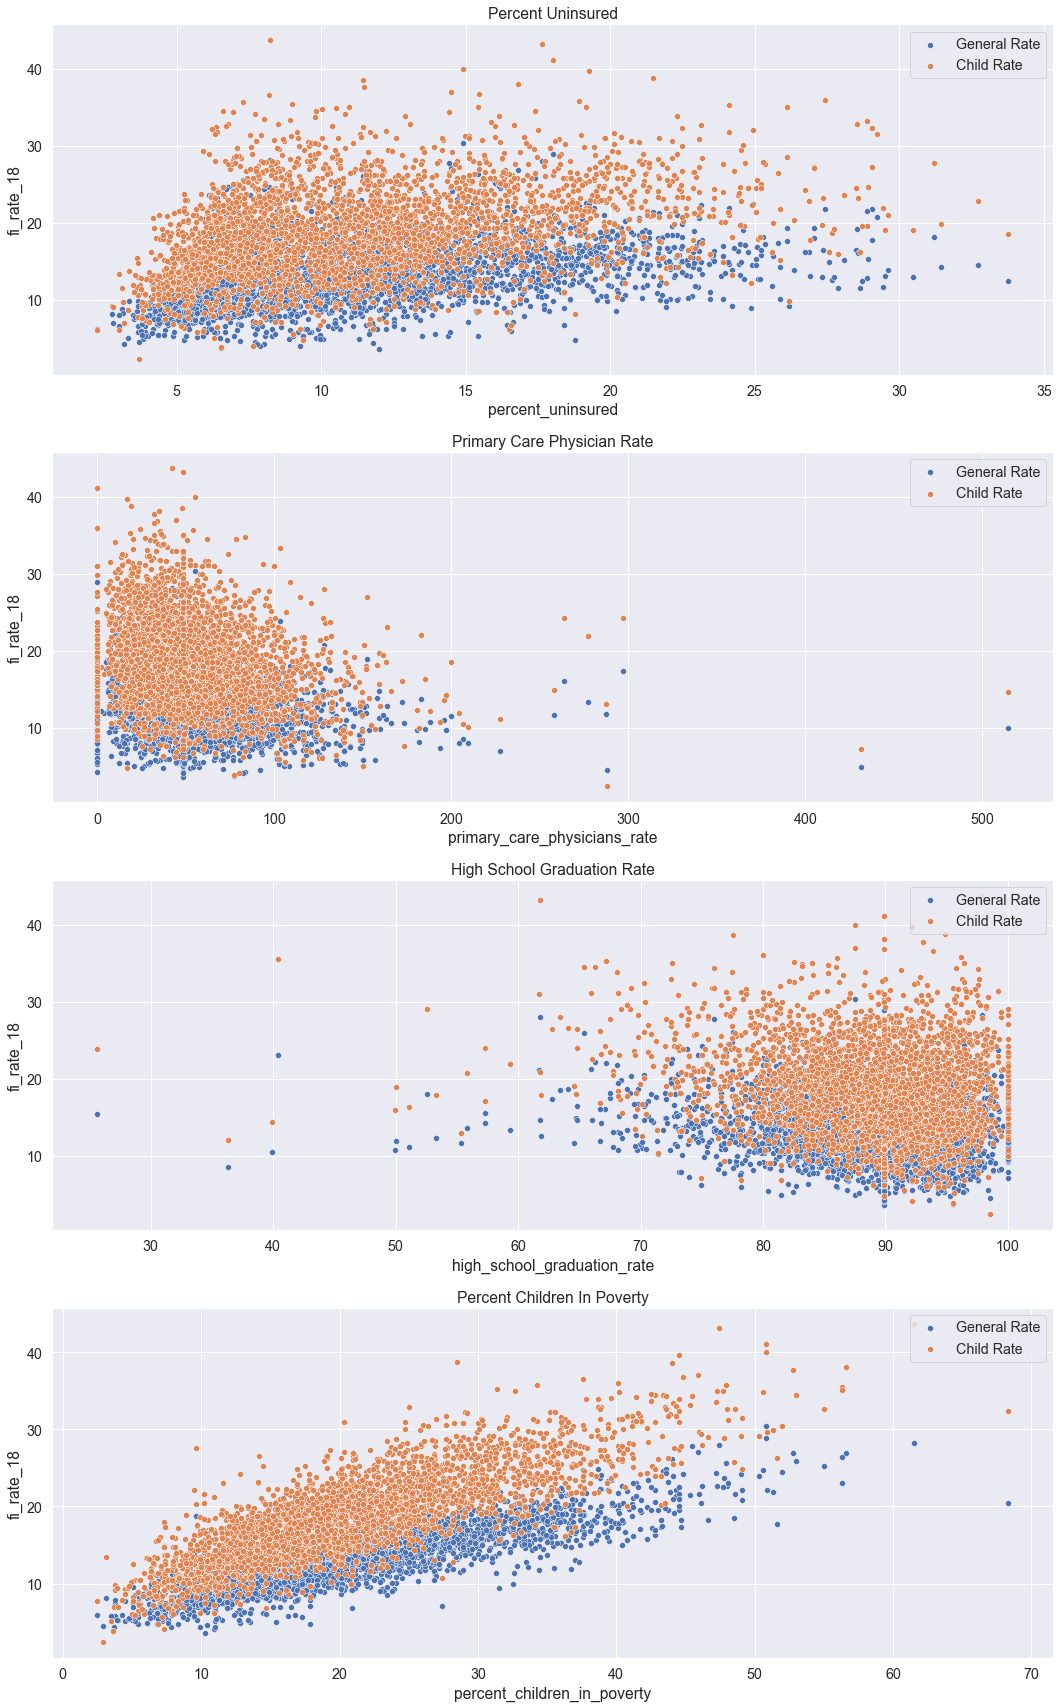

In [21]:
# Health Factors Against Food Insecurity
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 24), sharey = True)

g = sns.scatterplot(data = econ, x = 'percent_uninsured', y = 'fi_rate_18', palette = 'Blues', ax = ax1)
g = sns.scatterplot(data = econ, x = 'percent_uninsured', y = 'ch_fi_rate_18', palette = 'Reds', ax = ax1)
ax1.legend(['General Rate','Child Rate' ], loc = 'upper right')

h = sns.scatterplot(data = econ, x = 'primary_care_physicians_rate', y = 'fi_rate_18', palette = 'Blues', ax = ax2)
h = sns.scatterplot(data = econ, x = 'primary_care_physicians_rate', y = 'ch_fi_rate_18', palette = 'Reds', ax = ax2)
ax2.legend(['General Rate','Child Rate' ], loc = 'upper right')

i = sns.scatterplot(data = econ, x = 'high_school_graduation_rate', y = 'fi_rate_18', palette = 'Blues', ax = ax3)
i = sns.scatterplot(data = econ, x = 'high_school_graduation_rate', y = 'ch_fi_rate_18', palette = 'Reds', ax = ax3)
ax3.legend(['General Rate','Child Rate' ], loc = 'upper right')

j = sns.scatterplot(data = econ, x = 'percent_children_in_poverty', y = 'fi_rate_18', palette = 'Blues', ax = ax4)
j = sns.scatterplot(data = econ, x = 'percent_children_in_poverty', y = 'ch_fi_rate_18', palette = 'Reds', ax = ax4)
ax4.legend(['General Rate','Child Rate' ], loc = 'upper right')

g.title.set_text('Percent Uninsured')
h.title.set_text('Primary Care Physician Rate')
i.title.set_text('High School Graduation Rate')
j.title.set_text('Percent Children In Poverty')

plt.tight_layout();

<a id='bar'></a>
### Food Insecurity By State

In [22]:
df_fi_state = df.groupby('state_name')[['fi_rate_18']].mean().copy()

In [23]:
df_fi_state = df_fi_state.reset_index().sort_values(by = 'fi_rate_18', ascending = False)

In [24]:
df_fi_state.shape

(51, 2)

In [25]:
x_val = df_fi_state['state_name']
y_val = df_fi_state['fi_rate_18']

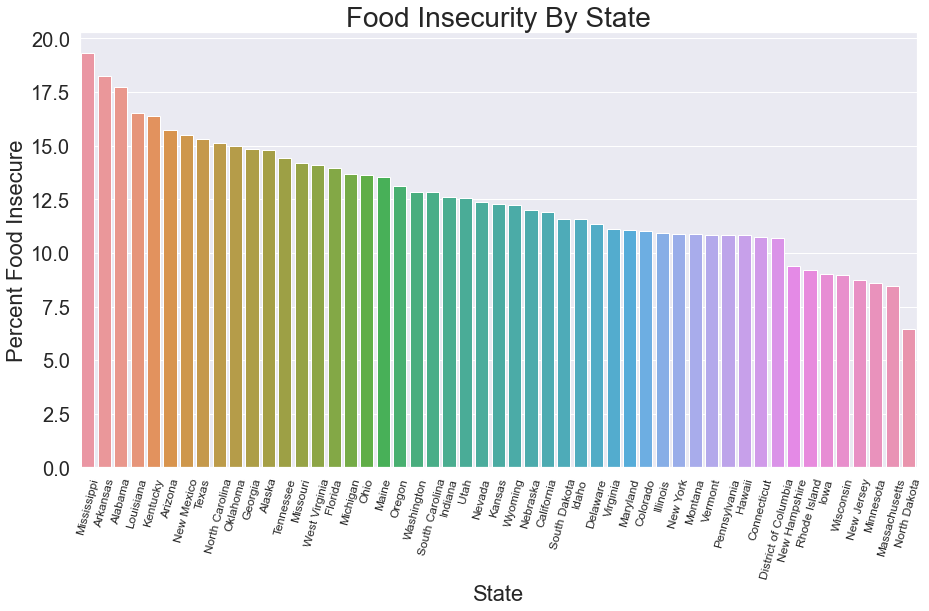

In [26]:
plt.figure(figsize = (15, 8))
sns.barplot(x = x_val, y = y_val)
sns.set(font_scale = 1.0)
plt.tick_params(labelsize = 20)
plt.xticks(rotation = 75, fontsize = 12)
plt.yticks(fontsize = 20)
plt.title('Food Insecurity By State', fontdict = {'fontsize': 28})
plt.xlabel('State', fontsize = 22)
plt.ylabel('Percent Food Insecure', fontsize = 22)
plt.show()

**Food Insecurities per State:**

The rates of food insecurity vary significantly by state, with a 10+ percent point difference between the highest (Mississippi - 19.32%) and lowest (North Dakota - 6.47%). States with the highest rates are predominantly clustered in the South and Southwest